In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#load data

import requests
import io

# Replace this with your actual file URL
file_url = "https://drive.google.com/drive/folders/1YnxDqNIqM2Xr1Dlgv5pYsE6dYJ9MGxcM?usp=sharing "

# # Download the file content
# response = requests.get(file_url)
# content = response.content

# # Read the CSV from the content
# #df = pd.read_csv(io.StringIO(content.decode('utf-8')))
# #print(df.head())
# content

In [3]:
df=pd.read_csv("c:\\Users\\ADMIN\\Downloads\\wine-reviews.csv", usecols=["country",'description','points','price','variety','winery'])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [4]:
df=df.dropna(subset=['description','points'])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


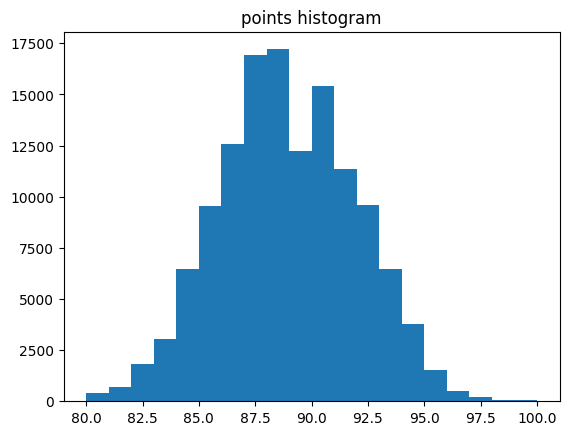

In [5]:
plt.hist(df.points,bins=20)
plt.title("points histogram")
plt.show()


**feed-forward neural net example**

In [6]:
diabetes=pd.read_csv("c:\\Users\\ADMIN\\Downloads\\diabetes.csv")

In [7]:
diabetes['Age'].min()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- **density parameter in the plt.hist function**

- In the `matplotlib.pyplot.hist` function, the `density` parameter plays a crucial role in how the histogram is scaled and interpreted. Here's a breakdown of its importance:

1. **Normalization**: When `density=True`, the histogram is normalized so that the area under the histogram sums to 1. This makes it a probability density function (PDF), allowing you to interpret the heights of the bars as probabilities.

2. **Comparison**: Normalizing histograms is particularly useful when comparing datasets with different sample sizes. It allows you to compare distributions on a common scale.

3. **Visual Representation**: By setting `density=True`, you can visualize how data is distributed across different ranges, which can be helpful for statistical analysis and understanding underlying patterns.

4. **Integration with Other Functions**: When you use `density=True`, the histogram can be compared more easily with theoretical distributions (like normal distributions) since both are represented as probabilities.

In summary, the `density` parameter helps in providing a meaningful interpretation of the histogram, particularly in the context of probability and comparison across datasets.

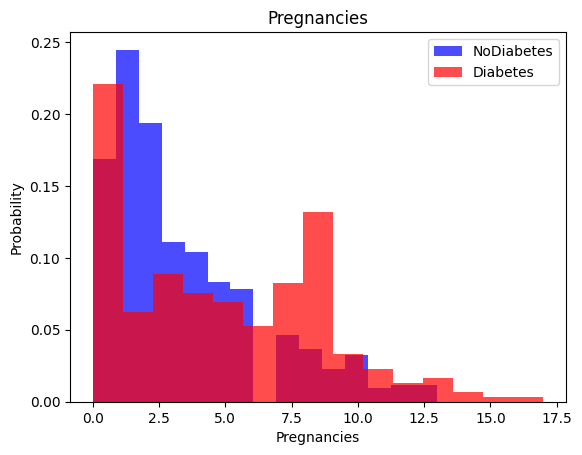

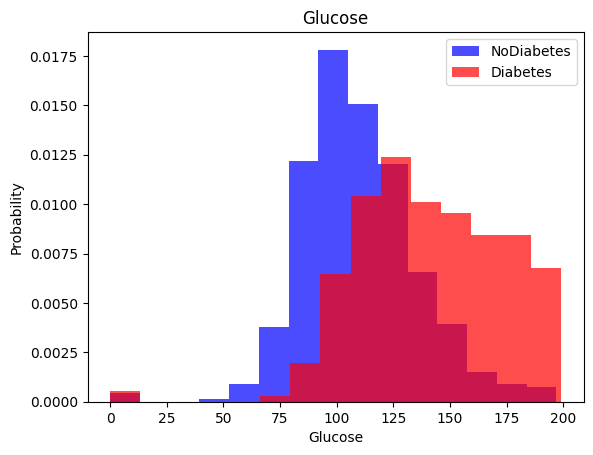

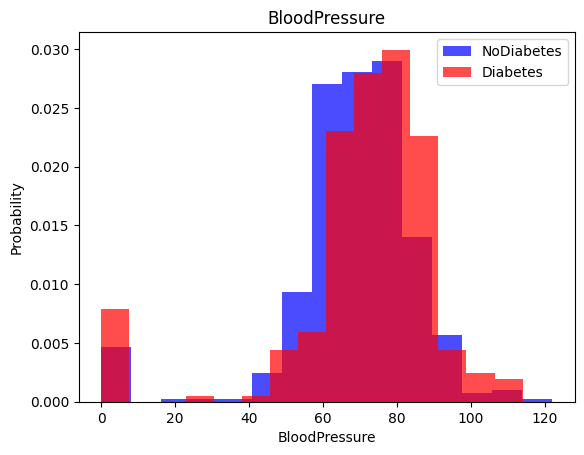

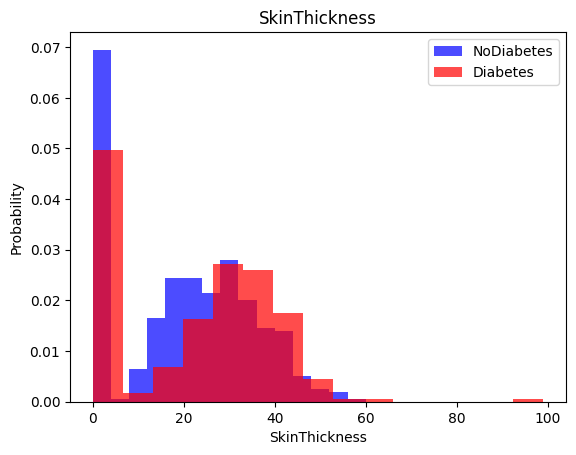

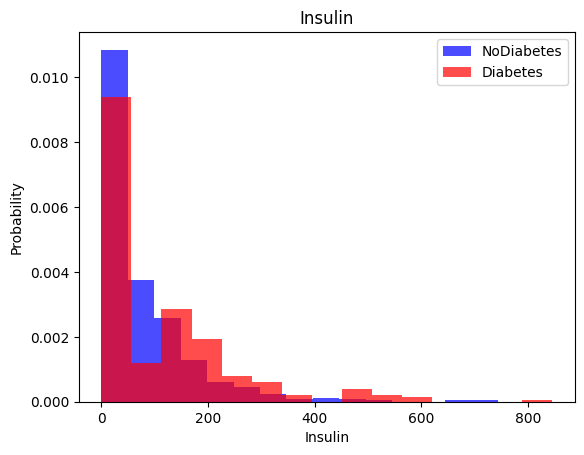

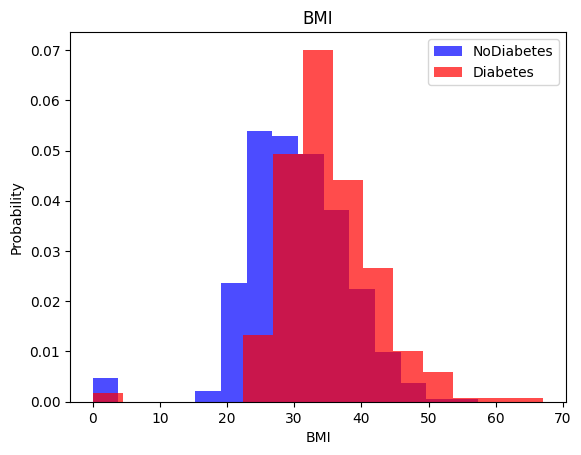

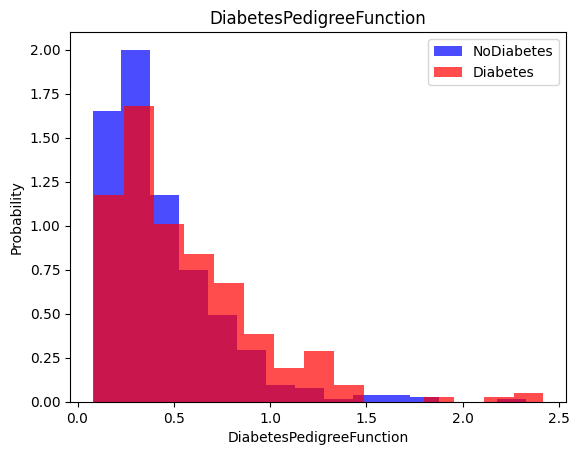

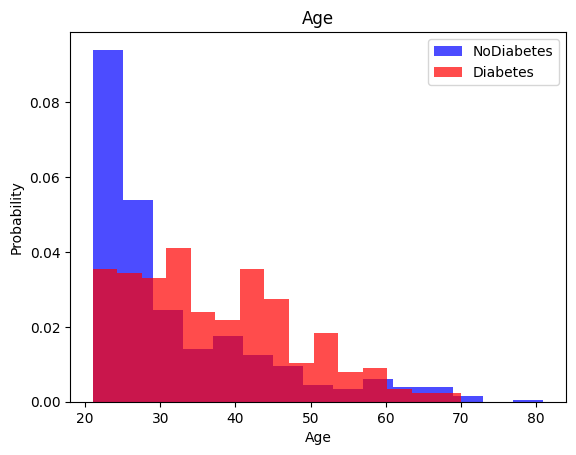

In [8]:
# plt.hist returns:
# x,
#    3238         bins=bins,
#    3239         range=range,
#    3240         density=density,
#    3241         weights=weights,
#    3242         cumulative=cumulative,
#    3243         bottom=bottom,
#    3244         histtype=histtype,
#    3245         align=align,
#    3246         orientation=orientation,



#Density=True we are taking each value dividinng ny number of values in the dataset making it probabilty and not count

for i in range(len(diabetes.columns[:-1])):
    label=diabetes.columns[i]
    plt.hist(diabetes[diabetes['Outcome']==0][label], color='b',label='NoDiabetes',alpha=0.7,density=True,bins=15)
    plt.hist(diabetes[diabetes['Outcome']==1][label], color='red',label='Diabetes',alpha=0.7,density=True,bins=15)
    plt.title(label)
    plt.ylabel('Probability')   
    plt.xlabel(label)   
    plt.legend()
    plt.show()

    




**checking distribution**

In [9]:
len(diabetes[diabetes['Outcome']==0]),len(diabetes[diabetes['Outcome']==1])

#coz of the high difference in length we need to get probability rather than counter so that both classes are on the same scale

(500, 268)

In [10]:
x=diabetes[diabetes.columns[:-1]].values#converting to a numpy array
y=diabetes[diabetes.columns[-1]].values



**splitting data**

- The `stratify` parameter in the `train_test_split` function from the scikit-learn library is used to ensure that the split between training and testing datasets maintains the same proportion of classes as in the original dataset. Here’s why this is important:

1. **Maintaining Class Distribution**: If you have a dataset with imbalanced classes (e.g., a classification problem with many more samples of one class than another), stratifying helps ensure that both the training and testing sets reflect this distribution. This prevents scenarios where one set might have too few or too many instances of a particular class.

2. **Improving Model Evaluation**: When the training and test sets are representative of the same class distributions, it leads to more reliable evaluation metrics. The model's performance can be assessed more accurately, reducing bias that may result from an unbalanced test set.

3. **Generalization**: Stratified sampling helps the model learn patterns that are representative of the entire dataset, improving its generalization to unseen data.




In this example, `y` contains the labels, and by using `stratify=y`, you ensure that the proportion of each class in `y` is preserved in both the training and testing sets.
i.e test_data no diabetes =0.4 * 500 and have_diabetes=0.4 * 268

**model building**

**Classes**
- class Model: Model groups layers into an object with training and inference features

- class Sequential: Sequential groups a linear stack of layers into a tf.keras.Model

`tensorflow.keras` is a high-level neural networks API built on top of TensorFlow, designed for ease of use and flexibility. Here’s a breakdown of its key features and components:

### Key Features

1. **User-Friendly**: It provides a simple interface to build and train neural networks, making it accessible to beginners while still powerful enough for advanced users.

2. **Modularity**: You can easily create complex models by stacking layers or using functional APIs. It supports various architectures, such as sequential, functional, and subclassing.

3. **Pre-trained Models**: `tensorflow.keras` includes a collection of pre-trained models (like VGG16, ResNet, Inception) that can be fine-tuned for specific tasks, saving time and computational resources.

4. **Customizability**: Users can create custom layers, loss functions, and optimizers, allowing for tailored architectures that meet specific requirements.

5. **Integration with TensorFlow**: Since it’s part of TensorFlow, it benefits from the underlying performance optimizations, support for distributed training, and compatibility with TensorFlow’s ecosystem (like TensorBoard for visualization).

### Core Components

1. **Layers**: Basic building blocks of neural networks. Common layers include:
   - `Dense`: Fully connected layer.
   - `Conv2D`: Convolutional layer for image processing.
   - `LSTM`: Long Short-Term Memory layer for sequence data.
   - `Dropout`: Regularization layer to prevent overfitting.

2. **Models**:
   - **Sequential**: For linear stacks of layers.
   - **Functional**: For more complex models with multiple inputs or outputs.
   - **Model Subclassing**: Allows for complete flexibility by creating custom model classes.

3. **Loss Functions**: Metrics to evaluate model performance, like `categorical_crossentropy`, `mean_squared_error`, etc.

4. **Optimizers**: Algorithms to update model weights, such as `Adam`, `SGD`, and `RMSprop`.

5. **Callbacks**: Functions that can be called at various stages of training, allowing for actions like saving models, early stopping, and learning rate adjustments.

6. **Data Handling**: Utilities for data preprocessing and augmentation, including `ImageDataGenerator` for image data.

### Example Usage

- Here's a simple example of building and training a model using `tensorflow.keras`:


- import tensorflow as tf
- from tensorflow.keras import layers, models

- ** Create a simple Sequential model
  - model = models.Sequential([
    - layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    - layers.Dense(64, activation='relu'),
    - layers.Dense(num_classes, activation='softmax')
])

- **Compile the model**
- model.compile(optimizer='adam',
          -    loss='sparse_categorical_crossentropy',
          -    metrics=['accuracy'])

- **Train the model**
- model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


- **Conclusion**

- `tensorflow.keras` is a powerful and flexible API that simplifies the process of building and training deep learning models while providing access to TensorFlow’s robust features. It’s widely used in both research and industry for developing state-of-the-art machine learning applications.

**Standardization**

In [11]:
#the output shows losses and accuracies on both train and validation test
#lets scale this data

from sklearn.preprocessing import StandardScaler
import pandas as pd
ss=StandardScaler()

# Apply StandardScaler to x
x = ss.fit_transform(x)

# Ensure y is a 2D array with the correct number of rows
if len(y.shape) == 1:  # If y is 1D
    y = y.reshape(-1, 1)
elif y.shape[0] == 1:  # If y is 2D but with only one row
    y = y.T  # Transpose y

print("After reshaping:")
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

# Ensure x and y have the same number of rows
if x.shape[0] != y.shape[0]:
    raise ValueError(f"x and y have different numbers of rows: x has {x.shape[0]}, y has {y.shape[0]}")

# Concatenate x and y
data = np.hstack((x, y))

# Create DataFrame
transformed_data = pd.DataFrame(data, columns=diabetes.columns)

print(f"Shape of transformed_data: {transformed_data.shape}")


After reshaping:
Shape of x: (768, 8)
Shape of y: (768, 1)
Shape of transformed_data: (768, 9)


**Resampling**

In [12]:
#imblearn-Imbalanced learn
from imblearn.over_sampling import RandomOverSampler

rs=RandomOverSampler()
x,y=rs.fit_resample(x,y)
y=np.reshape(y,(-1,1))
data = np.hstack((x, y))

# Create DataFrame
scaled_sampled_data = pd.DataFrame(data, columns=diabetes.columns)
scaled_sampled_data.head()
print( len(scaled_sampled_data.loc[scaled_sampled_data['Outcome'] == 0]) , len(scaled_sampled_data.loc[scaled_sampled_data['Outcome'] == 1]) )
scaled_sampled_data

#So now it means that we have a good ratio of the 2 samples




500 500


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
995,-1.141852,1.286484,0.356432,2.224559,0.175399,2.691630,0.867148,-0.701198,1.0
996,-0.844885,0.817027,1.286991,1.283638,-0.692891,2.196645,-0.343920,-0.531023,1.0
997,-0.844885,1.474267,0.976805,0.530902,-0.692891,0.381700,1.308085,1.596171,1.0
998,-1.141852,0.754432,-3.572597,-1.288212,-0.692891,1.549357,0.477552,-0.190672,1.0


In [13]:

from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0,stratify=y)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0,stratify=y_temp)

In [14]:
#.Sequntial groups a linear stack of layers into a tf.Keras.Model
model= tf.keras.Sequential ([
    tf.keras.layers.Dense(16,activation='relu'),#a 16 nueron dense layer is a layer that is deeply connected with its preceeding layer and the activation functon specified as relu(rectified linear unit,which is based on the priciple that if a value(x-input) is less than zero the y(output) is zero and if greater than zero then it's still that number x==y) 
    #every single neuron receives input from another neurons output from before
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")#here's where binary classification falls in remember our dataset has 2 classes in the label column 0 and 1

])

In [15]:
#LET'S COMPILE THE MODEL

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#that is the default learning_rate i.e alpha
    loss=tf.keras.losses.BinaryCrossentropy,#that is because we are using binaryClassification
    metrics=['accuracy']
  )

#optimizer=update the weights
#losss defines which loss function we are gonna use


In [16]:
#check performance on train and validation date

model.evaluate(x_train,y_train)
#from output we are getting a loss of 42.84716796875 and  #This output before preprocessing
# An accuracy of  0.3499999940395355
#which is bad

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4792 - loss: 0.7068   


[0.7072198987007141, 0.47833332419395447]

- The reason for such poor performance is because our model has not being trained i.e it has not yet seen ay training data

In [17]:
model.evaluate(x_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 0.7105 


[0.7062879204750061, 0.48500001430511475]

- This line of code is used to train a neural network model in Python, likely using a deep learning library such as TensorFlow, Keras, or PyTorch.

- Here's what each part of the code means: [1]

- model.fit(...): This is a method call on the model object, which is an instance of a neural network model class. The fit method is used to train the model on the provided data.

- x_train and y_train: These are the input features (independent variables) and target variables (dependent variables) for the training data, respectively. The model will learn the mapping between x_train and y_train during the training process.

- **batch_size=16**: 
 - This parameter specifies the number of samples to be propagated through the neural network at once. In this case, the batch size is set to 16. Typically, a smaller batch size can lead to better generalization, but it may take longer to train the model.

- **epochs=20**:
 - This parameter determines the number of times the entire training dataset will be passed through the neural network during the training process. In this case, the model will be trained for 20 epochs.

- **validation_data=(x_valid, y_valid):**
 - This parameter provides a separate dataset ( x_valid and y_valid) to be used for evaluating the model's performance during the training process. This is known as the validation set. The validation set is used to monitor the model's performance and prevent overfitting (a situation where the model performs well on the training data but poorly on new, unseen data).

- In summary, this line of code trains a neural network model using the provided training data ( x_train and y_train) for 20 epochs, with a batch size of 16. During the training process, the model's performance is evaluated on the validation data ( x_valid and y_valid) to monitor its generalization ability.

- It's important to note that this is just one line of code, and there are likely other steps involved in the overall process, such as data preprocessing, model architecture definition, and potentially more code for evaluating the trained model on a separate test set.

In [18]:
#Accuracy is so low co we haven't trainedthe data

model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5400 - loss: 0.6840 - val_accuracy: 0.6750 - val_loss: 0.6509
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7171 - loss: 0.6222 - val_accuracy: 0.7450 - val_loss: 0.6137
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.5725 - val_accuracy: 0.7600 - val_loss: 0.5865
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7538 - loss: 0.5544 - val_accuracy: 0.7550 - val_loss: 0.5683
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7424 - loss: 0.5199 - val_accuracy: 0.7450 - val_loss: 0.5583
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7536 - loss: 0.5214 - val_accuracy: 0.7400 - val_loss: 0.5490
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7772 - loss: 0.4834 - val_accuracy: 0.7500 - val_loss: 0.5422
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.4963 - val_accuracy: 0.7600 - val_loss

In [19]:
results=model.evaluate(x_test,y_test)
print(results)
print(results[0])
print(results[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7228 - loss: 0.5533  
[0.5233824849128723, 0.7450000047683716]
0.5233824849128723
0.7450000047683716


## Text Classification


In [20]:
#we gonna be using the wine_reviews dataset
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [21]:
df['label']=(df.points >= 90).astype(int)
df=df[['description','label']]
df

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,1
129967,Citation is given as much as a decade of bottl...,1
129968,Well-drained gravel soil gives this wine its c...,1
129969,"A dry style of Pinot Gris, this is crisp with ...",1


In [22]:
train,valid,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [23]:
len(train),len(valid),len(test)

(103976, 12997, 12998)

- This function, df_to_dataset, is designed to transform a Pandas DataFrame into a TensorFlow tf.data.Dataset object. This dataset is then shuffled, batched, and prepared for training, validation, or testing in a machine learning model
- This function is particularly useful for creating an efficient data pipeline, as it enables seamless data loading and batching for TensorFlow models, especially for large datasets.

In [24]:
#Function to convert each training,validation and test srt Dtaframe into a tf.data.Dataset object,then shuffles and batches the data
def df_to_dataset(dataframe,shuffle=True,batch_size=1024):
    df=dataframe.copy()# creates a copy of the DataFrame to avoid modifying the original data.
    labels=df.pop('label')#separates the target label column (label) from the feature columns, so df will only contain features.
    #df = {key : value[:,tf.newaxix] for key, value in datframe.items()}
    df=df['description']
    ds=tf.data.Dataset.from_tensor_slices((df,labels))#converts the features and labels into a tf.data.Dataset object, which TensorFlow can work with directly.
    if shuffle:
        ds=ds.shuffle(buffer_size=len(dataframe))#If shuffle is True, the dataset is shuffled with a buffer size equal to the length of the DataFrame, ensuring all elements are well shuffled.
    ds=ds.batch(batch_size)#ds.batch(batch_size) groups the dataset into batches of the specified size, which helps optimize the training process.    
    ds=ds.prefetch(tf.data.AUTOTUNE)#ds.prefetch(tf.data.AUTOTUNE) ensures that the data is preloaded for the next batch, reducing training time by overlapping the data preprocessing and model training.
    return ds

In [25]:
train_data=df_to_dataset(train)
valid_data=df_to_dataset(valid)
test_data=df_to_dataset(test)

In [26]:
len(train_data)
print(1024*101)
103976-103424

103424


552

In [27]:
list(train_data)[101]

(<tf.Tensor: shape=(552,), dtype=string, numpy=
 array([b'The charms of this full-bodied wine are mainly in the substantial and viscous texture, while mild mineral and apricot flavors provide subtle backup. Far from being simply fruity, the style emphaizes the soothing, mouth-coating feel of the wine.',
        b"Fermented in open-top tanks, this dense and beautifully concentrated wine is rich and structured while remaining sophisticated. Although it is still young, it's supported by ripe, intense black fruits and balanced acidity. This has a long way to develop, so drink from 2018.",
        b'Cola, rubber, cool blackberry and spice make for a good set of aromas, while the palate is tight and drawing, with tannic bite to go with bawdy black fruit flavors that veer toward roasted. Finishes with length along with coffee and olive flavors. A little astringent but good wine.',
        b'A dark, ripe and fruity wine that is full of dense red-fruit aromas and spicy tannins. The palate offer

- tensorflow_hub is a repo containing trined machine learning models
- we are going to be using  nnlm-nn-dim50 
  - This is a based text embedding trained on english google news 7B corpous

## Embedding + Model

In [28]:
embedding_model="https://tfhub.dev/google/nnlm-en-dim50/2"#embedding is a URL pointing to a pre-trained embedding model hosted on TensorFlow Hub. This specific model, nnlm-en-dim50, provides 50-dimensional word embeddings trained on English text.

hub_layer=hub.KerasLayer(embedding_model,input_shape=[],dtype=tf.string,trainable=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

- embedding is a URL pointing to a pre-trained embedding model hosted on TensorFlow Hub. This specific model, nnlm-en-dim50, provides 50-dimensional word embeddings trained on English text.
- hub.KerasLayer wraps the TensorFlow Hub embedding model as a Keras layer.
- dtype=tf.string specifies that this layer expects input data in string format, which is typical for embedding layers that process raw text.
- trainable=True allows the embedding weights to be fine-tuned during training. This can improve performance if the dataset is significantly different from the data the model was originally trained on.
- The hub_layer can now be used in a Keras model to transform text inputs into numerical embeddings. These embeddings capture semantic meaning, allowing similar words to have embeddings that are close in vector space. When used in a model, hub_layer will convert each input sentence or word into a 50-dimensional vector representation, which can be useful for natural language processing (NLP) tasks.

In [ ]:
hub_layer(list(train_data)[0][0])

In [ ]:
# Assuming train_data is a tf.data.Dataset containing (text, label) pairs
def preprocess_text(text, label):
    # Pass only the text through hub_layer to get embeddings
    text_embedded = hub_layer(text)
    return text_embedded, label

# Apply the preprocessing function to each element in the dataset
train_data = train_data.map(preprocess_text)

In [ ]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 50), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_data=hub_layer(train_data)

In [ ]:
model=tf.keras.Sequential()
model.add(hub_layer)  #Transformation
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


# model = tf.keras.Sequential([
#     hub_layer,  # Add the hub layer as the first layer
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(16, activ ation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# inputs = tf.keras.Input(shape=(), dtype=tf.string)
# x = hub_layer(inputs)  # Embedding layer
# x = tf.keras.layers.Dense(16, activation='relu')(x)
# x = tf.keras.layers.Dense(16, activation='relu')(x)
# outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


# model = tf.keras.Model(inputs=inputs, outputs=outputs)

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000022061E17710> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
print(tf.__version__)    # Should be 2.x (e.g., 2.12)
print(hub.__version__)   

Certainly! Let’s go deeper into embeddings and explain each part of this code with more context on why embeddings are essential in machine learning, especially for text data.

### What are Embeddings?

In natural language processing (NLP), embeddings are a way to represent words, sentences, or even entire documents as numerical vectors in a high-dimensional space. These vectors capture the semantic meaning of text, allowing the model to understand language in a way that accounts for similarities between words. For instance, the words "king" and "queen" or "car" and "vehicle" will have embeddings that are close to each other in this space, reflecting their related meanings.

Embeddings are beneficial because:
1. They convert raw text into numbers, making it usable by machine learning models.
2. They allow similar words or phrases to have similar vector representations, which improves the model’s ability to generalize.
3. They reduce the "sparsity" of data (i.e., the model can learn more efficiently from smaller, dense vectors rather than large, sparse representations like one-hot encoding).

### Code Explanation

Here’s how your code leverages TensorFlow Hub and embeddings:

1. **Selecting the Embedding Model URL:**
   ```python
   embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
   ```
   - This `embedding` URL points to a pre-trained word embedding model hosted on TensorFlow Hub. 
   - Specifically, `"nnlm-en-dim50"` is a model trained by Google to produce **50-dimensional embeddings** for English words. This means each word or text input will be transformed into a 50-dimensional vector.
   - Pre-trained embeddings are effective because they’ve already learned general language patterns from large datasets, like Wikipedia or the Common Crawl dataset, making them adaptable to various NLP tasks.

2. **Creating the Keras Embedding Layer:**
   ```python
   hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)
   ```
   - `hub.KerasLayer` allows us to bring in a TensorFlow Hub model directly into our Keras (TensorFlow’s high-level API for building models) pipeline.
   - The parameter `dtype=tf.string` specifies that this layer expects inputs as strings, i.e., raw text, such as sentences or individual words.
   - `trainable=True` makes the embedding layer **fine-tunable**. Fine-tuning means the model can adjust the pre-trained embedding weights slightly during training, allowing it to adapt to the specific dataset you’re working with. This is particularly useful if your dataset has specific vocabulary or jargon different from the data the model was trained on.

### How the Embedding Layer Fits into a Model

In practice, this `hub_layer` would be the first layer in your neural network model. Here’s how it might fit into a text classification model, for example:

```python
model = tf.keras.Sequential([
    hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

1. **First Layer (hub_layer)**: Converts raw text into 50-dimensional embeddings.
   - Each word or phrase input will be converted into a 50-dimensional vector, where the dimensions represent abstract properties or "meanings" the embedding model has learned.
   
2. **Dense Layers**: Use the embeddings as input for further learning.
   - Dense layers take the embeddings and learn features that help with the specific task, like text classification or sentiment analysis.

3. **Output Layer**: Makes predictions.
   - For a binary classification task, the output layer would have a single neuron with a sigmoid activation to produce probabilities.

### Why Use Pre-trained Embeddings?

- **Faster Convergence**: Pre-trained embeddings already encode a lot of linguistic information, so the model often learns faster than it would from scratch.
- **Better Generalization**: Using embeddings trained on massive datasets helps the model generalize better, especially for tasks with limited data.
- **Semantic Similarity**: Pre-trained embeddings group similar words close together in vector space, helping models capture meaning more effectively.

### Summary

This `hub_layer` with pre-trained embeddings is a powerful tool that simplifies working with text in machine learning. It reduces the effort required to transform raw text into a form a model can understand, while retaining semantic nuances of language that benefit the model’s ability to make meaningful predictions. By setting `trainable=True`, you allow the model to adapt the embeddings to fit the unique vocabulary or nuances in your dataset, enhancing performance on your specific task.